# Exercise: Visualising decision boundaries of classifiers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Getting a 2D dataset to play with
First of all let's create some two-dimensional artificial datasets to work with. We can use the default `moons` dataset from `sklearn`:

In [2]:
from sklearn.datasets import make_moons

In [3]:
X, y = make_moons(n_samples=1000, noise=0.3, random_state=0)
dataset_moons = (X, y)

### Now train a simple decision tree and plot it

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

In [6]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

to plot it in the 2D plane of features we need to calculate its response in a 2D grid of points

In [7]:
xmin, xmax = np.min(X[:, 0]), np.max(X[:, 0])
ymin, ymax = np.min(X[:, 1]), np.max(X[:, 1])

In [8]:
xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.05),
                     np.arange(ymin, ymax, 0.05))

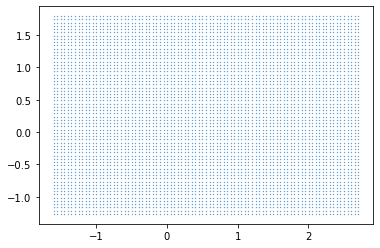

In [9]:
plt.scatter(xx, yy, s=0.1)

The probability prediction function of our decision tree wants an array of the same shape as X. We need to transform the grid, calculate the probability and then reshape it to plot it on the grid

In [10]:
X_meshgrid = np.transpose([xx.ravel(), yy.ravel()])
Z = dt.predict_proba(X_meshgrid)[:, 1]
Z = Z.reshape(xx.shape)

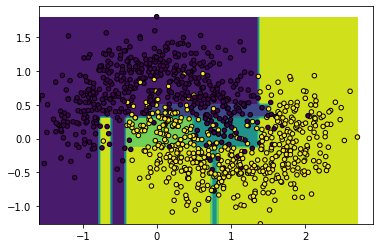

In [11]:
plt.contourf(xx, yy, Z)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')

## Now try with an XGBoost classifier and a neural network

In [12]:
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [13]:
## YOUR CODE HERE

# Try other datasets
Try to train the three classifiers on the two datasets below. Compare the performances visually

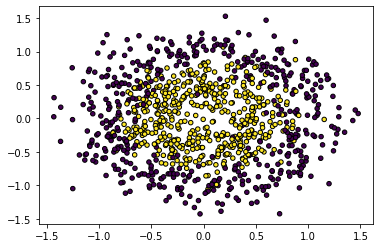

In [14]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, noise=0.2, 
                    factor=0.5, random_state=1)
dataset_circles = (X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')

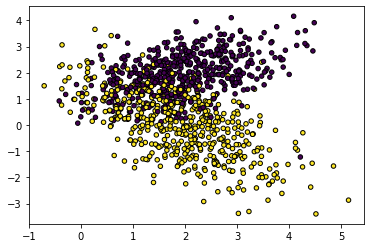

In [15]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, n_redundant=0, 
                           n_informative=2, random_state=1,
                           n_clusters_per_class=1, n_samples=1000)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
dataset3 = (X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')

In [20]:
# YOUR CODE HERE